<a href="https://colab.research.google.com/github/team0243/DWDM21/blob/main/Data103(Chapter3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #ทำงานกับข้อมูลลักษณะ ตาราง

In [2]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os #จัดการไฟล์และ path

In [4]:
path = '/content/drive/My Drive/DWDM2021_DATA'

In [14]:
data_cases = pd.read_csv(os.path.join(path,'confirmed-cases.csv'))
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


***Meta Data (Data อธิบาย Data)***

#ชี้ข้อมูลในตาราง

### ชี้แบบธรรมดาใช้[ชื่อ][colum]

In [12]:
data_cases[ 'risk' ]

0         คนต่างชาติเดินทางมาจากต่างประเทศ
1         คนต่างชาติเดินทางมาจากต่างประเทศ
2         คนต่างชาติเดินทางมาจากต่างประเทศ
3         คนต่างชาติเดินทางมาจากต่างประเทศ
4         คนต่างชาติเดินทางมาจากต่างประเทศ
                        ...               
543301                    ทัณฑสถาน/เรือนจำ
543302                    ทัณฑสถาน/เรือนจำ
543303                    ทัณฑสถาน/เรือนจำ
543304                    ทัณฑสถาน/เรือนจำ
543305                                 NaN
Name: risk, Length: 543306, dtype: object

In [13]:
data_cases[ 'risk' ][784]

'สนามมวย'

### ชี้แบบ .iloc[](มองข้อมูลเป็น matrix)

In [15]:
data_cases.iloc[678,8]

'สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้'

In [17]:
data_cases.iloc[-10:,[3,4,8]]

,sex,age,risk
543296,ชาย,47.0,ทัณฑสถาน/เรือนจำ
543297,ชาย,38.0,ทัณฑสถาน/เรือนจำ
543298,ชาย,39.0,ทัณฑสถาน/เรือนจำ
543299,ชาย,40.0,ทัณฑสถาน/เรือนจำ
543300,ชาย,38.0,ทัณฑสถาน/เรือนจำ
543301,ชาย,39.0,ทัณฑสถาน/เรือนจำ
543302,ชาย,37.0,ทัณฑสถาน/เรือนจำ
543303,ชาย,28.0,ทัณฑสถาน/เรือนจำ
543304,ชาย,26.0,ทัณฑสถาน/เรือนจำ
543305,NaN,NaN,NaN


In [38]:
data_cases.iloc[-10:,3:4:8]

,sex
543296,ชาย
543297,ชาย
543298,ชาย
543299,ชาย
543300,ชาย
543301,ชาย
543302,ชาย
543303,ชาย
543304,ชาย
543305,NaN


In [18]:
data_cases.describe()

,No.,age
count,543305.000000,491048.000000
mean,271653.000000,35.519252
std,156838.788338,16.197363
min,1.000000,1.000000
25%,135827.000000,25.000000
50%,271653.000000,34.000000
75%,407479.000000,46.000000
max,543305.000000,108.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7ffbbd003610>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffbbd00f710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffbbd015750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffbbd015210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffbbd003c50>,
  <matplotlib.lines.Line2D at 0x7ffbbd00f1d0>]}

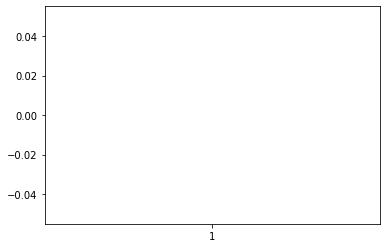

In [37]:
from matplotlib import pyplot as plt
plt.boxplot(data_cases['age']) # age มีข้อมูลที่ missing ทำให้ plot กราฟไม่ได้

###Missing Values

*NaN = Not a Number
*Null 
*Na = Not Available

In [19]:
data_cases.isnull()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,False,False,True,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
543301,False,False,False,False,False,False,True,False,False,False,True
543302,False,False,False,False,False,False,True,False,False,False,True
543303,False,False,False,False,False,False,True,False,False,False,True
543304,False,False,False,False,False,False,True,False,False,False,True


In [ ]:
data_cases

In [39]:
data_cases.isnull().any() #.any ช่วยสรุปข้อมูลให้เป็น column

No.                      True
announce_date            True
Notified date            True
sex                      True
age                      True
Unit                     True
nationality              True
province_of_isolation    True
risk                     True
province_of_onset        True
district_of_onset        True
dtype: bool

###Handling Missing Value1 (ลบค่าลบค่า missing ออกไป)

{'boxes': [<matplotlib.lines.Line2D at 0x7ffbbcb518d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffbbcb549d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffbbcb5aa10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffbbcb5a4d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffbbcb51f10>,
  <matplotlib.lines.Line2D at 0x7ffbbcb54490>]}

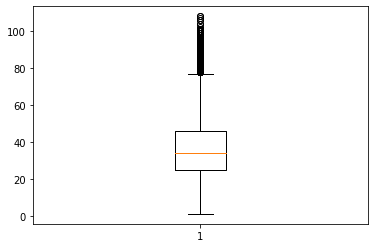

In [40]:
plt.boxplot(data_cases['age'].dropna()) #.dropna ช่วยลบค่า missing ออก

In [41]:
data_cases.dropna()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
47,48.0,6/3/2020,4/3/2020,ชาย,43.0,ปี,United Kingdom,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,คลองตัน
124,125.0,6/3/2021,5/3/2021,หญิง,55.0,ปี,Thailand,ปทุมธานี,Cluster ตลาดพรพัฒน์,ปทุมธานี,ธัญบุรี
161,162.0,17/3/2020,21/3/2020,ชาย,14.0,ปี,Thailand,สุราษฎร์ธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุราษฎร์ธานี,เมือง
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
186,187.0,18/3/2020,16/3/2020,ชาย,36.0,ปี,Thailand,ร้อยเอ็ด,สนามมวย,ร้อยเอ็ด,เชียงขวัญ
...,...,...,...,...,...,...,...,...,...,...,...
543098,543099.0,28/7/2021,27/7/2021,หญิง,63.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นครปฐม,พุทธมณฑล
543099,543100.0,28/7/2021,27/7/2021,ชาย,67.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,หนองแขม
543100,543101.0,28/7/2021,27/7/2021,หญิง,68.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ดุสิต
543101,543102.0,28/7/2021,27/7/2021,ชาย,73.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ราษฎร์บูรณะ


In [42]:
data_cases.dropna().shape # ดูว่าข้อมูลมีทั้งหมดเท่าไร

(385643, 11)

In [43]:
data_cases.dropna().shape[0]

385643

Quiz 3 ให้หาว่าการทำ dropna() ทำให้ข้อมูลหายไปกี่ %


```
size before drop = 1000
size after drop = 10 
we lost 99% of data
```

In [46]:
removed = data_cases.shape[0] - data_cases.dropna().shape[0]

In [47]:
print(f'size before drop = {data_cases.shape[0]}')
print(f'size after drop = {data_cases.dropna().shape[0]}')
print(f'we lost {100*(removed/data_cases.shape[0])}% of data')

size before drop = 543306
size after drop = 385643
we lost 29.019189922437818% of data


### Handling Missing Value 1.5 (ลบค่า missing เฉพาะใน column ที่เราสนใจ)

In [48]:
data_cases_nomissingAge = data_cases.dropna(subset=['age'])

{'boxes': [<matplotlib.lines.Line2D at 0x7ffbbca4fd90>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffbbca55e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffbbca5ced0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffbbca5c990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffbbca55410>,
  <matplotlib.lines.Line2D at 0x7ffbbca55950>]}

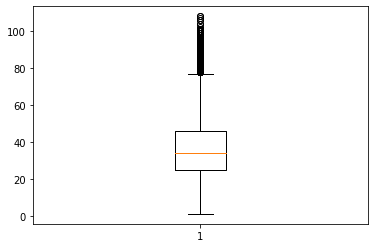

In [49]:
plt.boxplot(data_cases_nomissingAge['age'])

Quiz 3.1 ให้หาว่าการทำ dropna() แบบเลือก drop เฉพาะ column ที่เราสนใจ (age) ทำให้ข้อมูลหายไปกี่ %

In [52]:
removed = data_cases_nomissingAge.shape[0] - data_cases_nomissingAge.dropna().shape[0]

In [51]:
print(f'size before drop = {data_cases_nomissingAge.shape[0]}')
print(f'size after drop = {data_cases_nomissingAge.dropna().shape[0]}')
print(f'we lost {100*(removed/data_cases_nomissingAge.shape[0])}% of data')

size before drop = 491048
size after drop = 385643
we lost 21.465314999755623% of data
